# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will explore Medical Appointment No Show dataset to analize it and know the answers for some questions which are:

>1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

>2- Whether or not the gender affecting the showing up?

>3- What is the average age that doesn't show up?

>4- What is the most common neighborhood where the patients don't show up?

>5- Whether or not recieving SMS has an effect on showing up?


In [2]:
# importing the needed liberaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Number of patients (rows) and their info (columns) before cleaning
df.shape

(110527, 14)

In [5]:
# checking for data types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing data

In [6]:
#checking for duplicated data
sum(df.duplicated())

0

No duplicated data

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [8]:
# Droping the non-useful columns
df.drop(['PatientId','AppointmentID', 'ScheduledDay','AppointmentDay'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


In [10]:
# Renaming the columns to match with each other
df.rename(columns={'No-show':'No_show'}, inplace =True)

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#dropping invalid data: age with negative value 
df.drop(df[df['Age'] == -1].index, inplace = True)

In [13]:
#check if it's dropped or not
df[df['Age'] == -1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [14]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [15]:
#dropping invalid data: Handcap with non-boolean value  
df.drop(df[df['Handcap'] > 1].index, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110327 non-null object
Age              110327 non-null int64
Neighbourhood    110327 non-null object
Scholarship      110327 non-null int64
Hipertension     110327 non-null int64
Diabetes         110327 non-null int64
Alcoholism       110327 non-null int64
Handcap          110327 non-null int64
SMS_received     110327 non-null int64
No_show          110327 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


In [17]:
#saving cleaned data
df.to_csv('clean_df.csv',index=False)

In the wrangling and data cleaning section we made little changes to clean the dataset such as:
> Fisrtly we checked that our dataset has no missing or duplicated data.

> Then we dropped the columns that will not be useful for us during analyzing such as PatientID, AppointmentID, ScheduledDay, and AppointmentDay.

> we also dropped the rows that have invalid inputs such as age with negative value, and Handcap with non-boolean value.

> Finally we saved the cleaned data in a separate csv file.

<a id='eda'></a>
## Exploratory Data Analysis

>dependent variable = no_show

>independent variables = age, scholarship, hipertension, diabetes, alcoholism, handcap

### 1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [32]:
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092119,0.503676,0.291760,0.095686,0.081951,0.012774
Scholarship,-0.092119,1.000000,-0.019241,-0.024612,0.035224,-0.009192,0.001202
Hipertension,0.503676,-0.019241,1.000000,0.432264,0.088087,0.081366,-0.006238
Diabetes,0.291760,-0.024612,0.432264,1.000000,0.018634,0.054716,-0.014782
Alcoholism,0.095686,0.035224,0.088087,0.018634,1.000000,0.003118,-0.026080
Handcap,0.081951,-0.009192,0.081366,0.054716,0.003118,1.000000,-0.024031
SMS_received,0.012774,0.001202,-0.006238,-0.014782,-0.026080,-0.024031,1.000000


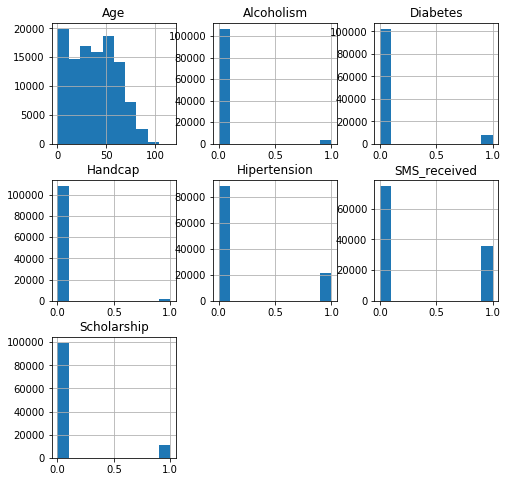

In [33]:
df.hist(figsize= (8,8));

Most patients are non-alcoholic and don't suffer from chronic diseases.
Many patients didn't recieve SMS.
So, we will keep exploring the other variables.

### 2- Whether or not the gender affecting the showing up?

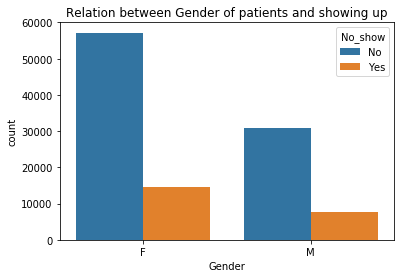

In [34]:
sns.countplot(x='Gender', hue = 'No_show', data = df)
plt.title('Relation between Gender of patients and showing up');

In [35]:
df.groupby(['No_show','Gender']).size()

No_show  Gender
No       F         57162
         M         30887
Yes      F         14568
         M          7710
dtype: int64

It looks like Females who made appointment are much more than Males in general.
>Females are more than the males who showed up.

>And also females are more than the males who didn't.

>so, gender has no effect on showing up

### 3- What is the average age that doesn't show up?

In [36]:
show = df.No_show == 'No'
no_show = df.No_show == 'Yes'

In [37]:
df.Age[show].mean()

37.77709002941544

In [38]:
df.Age[no_show].mean()

34.279109435317352

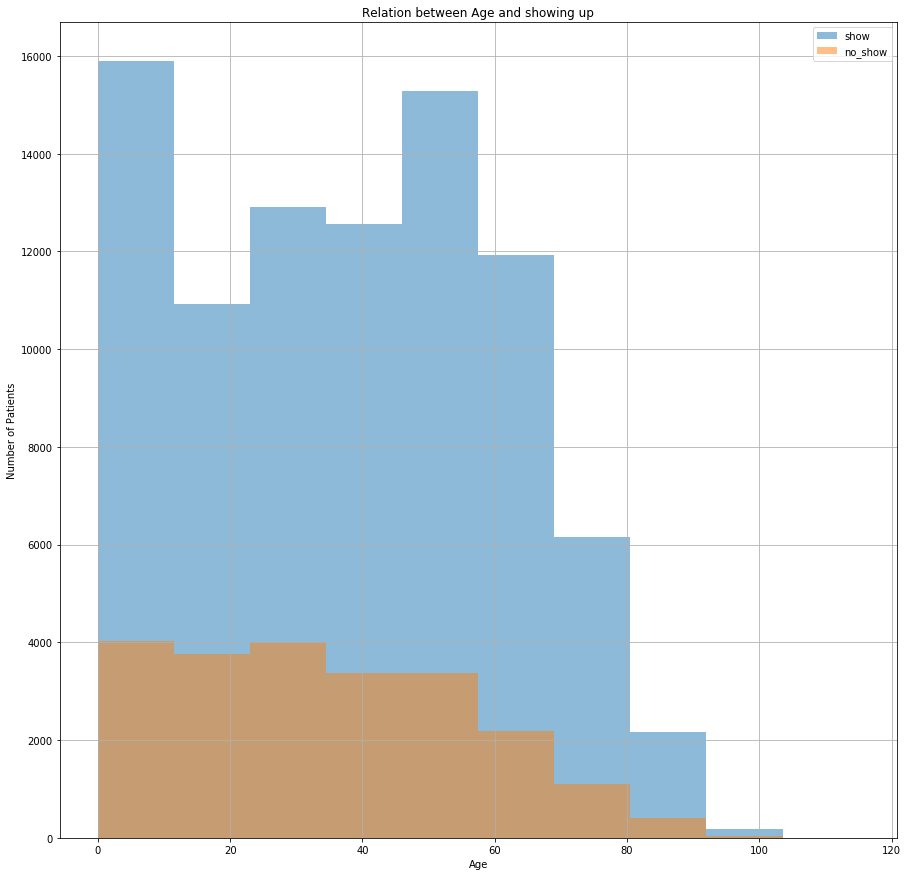

In [39]:
plt.figure(figsize=(15,15))
df.Age[show].hist(label= 'show', alpha=0.5)
df.Age[no_show].hist(label= 'no_show', alpha = 0.5)
plt.legend();
plt.title('Relation between Age and showing up')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

Average Age of patient that doesn't show up is 34.279109435317352
Average Age of patient that shows up is 37.77709002941544

### 4- What is the most common neighborhood where the patients don't show up?

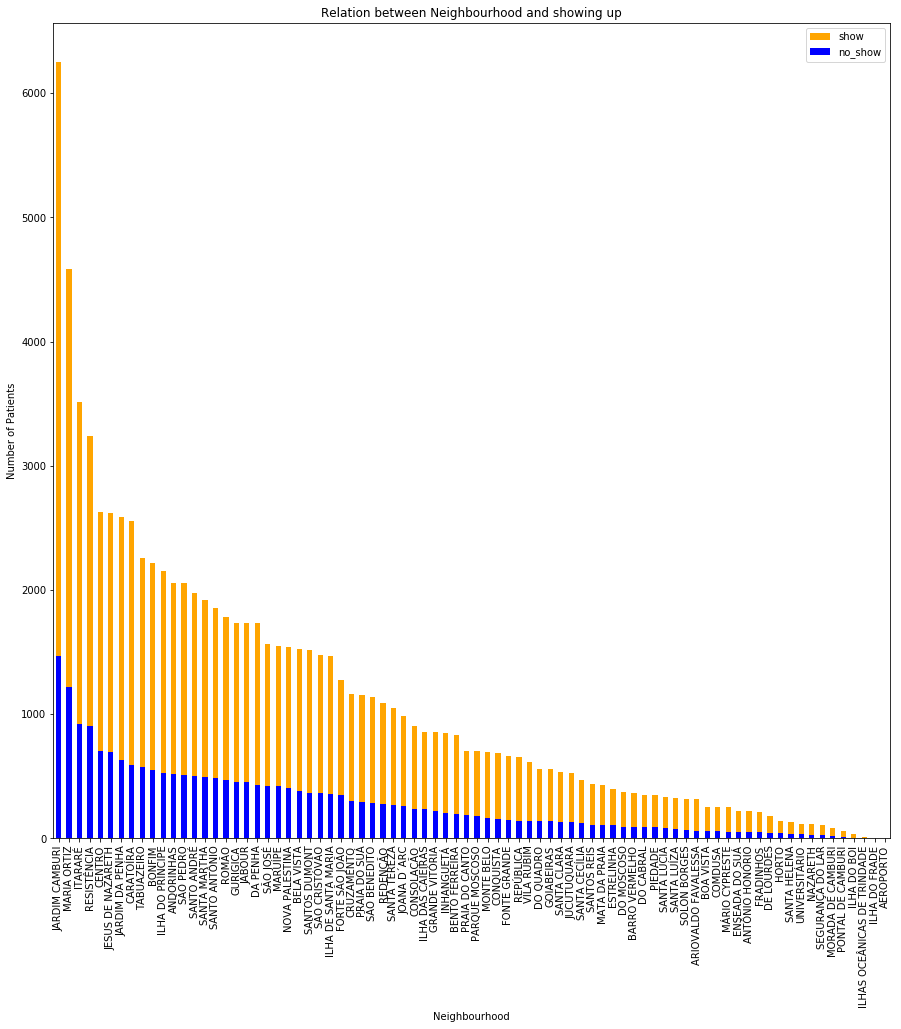

In [40]:
plt.figure(figsize=(15,15))
df.Neighbourhood[show].value_counts().plot(kind = 'bar', label= 'show', color='orange')
df.Neighbourhood[no_show].value_counts().plot(kind= 'bar', label= 'no_show', color = 'blue')
plt.legend();
plt.title('Relation between Neighbourhood and showing up')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

In [41]:
df.Neighbourhood[show].mode()

0    JARDIM CAMBURI
dtype: object

In [42]:
df[df['Neighbourhood']=='JARDIM CAMBURI'].count()

Gender           7717
Age              7717
Neighbourhood    7717
Scholarship      7717
Hipertension     7717
Diabetes         7717
Alcoholism       7717
Handcap          7717
SMS_received     7717
No_show          7717
dtype: int64

It looks like the neighbourhood is strongly affecting the attendence of patients.

The most common neighbourhood of attendence is JARDIM CAMBURI

### 5- Whether or not recieving SMS has an effect on showing up?

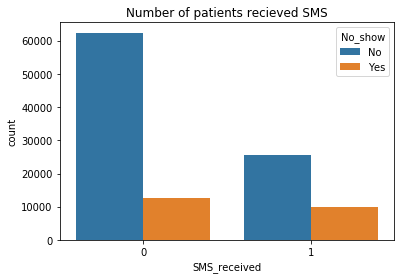

In [43]:
sns.countplot(x='SMS_received', hue = 'No_show', data = df)
plt.title('Number of patients recieved SMS');

Most of the patients who recieved sms didn't show up.
However, receiving sms doesn't affect patients showing up.

<a id='conclusions'></a>
## Conclusions

1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> we found out that most patients are non-alcoholic and don't suffer from chronic diseases.

> Many patients didn't recieve SMS.

2- Whether or not the gender affecting the showing up?
> Females who made appointment are much more than Males in general.

>Females are more than the males who showed up.

>And also females are more than the males who didn't.

>so, gender has no effect on showing up

3- What is the average age that doesn't show up?
>Average Age of patient that doesn't show up is 34.279109435317352 

>Average Age of patient that shows up is 37.77709002941544

4- What is the most common neighborhood where the patients don't show up?
> the neighbourhood is strongly affecting the attendence of patients.

>The most common neighbourhood of attendence is JARDIM CAMBURI

5- Whether or not recieving SMS has an effect on showing up?
>Most of the patients who recieved sms didn't show up. 

>However, receiving sms doesn't affect patients showing up.

#### Limitations: 
> we couldn't find a correlation between patients attendence and some variables such as gender, chronic diseases, and alcoholism.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0